# UFABC - ESTI019 - Codificação de Sinais Multimídia
<h2> Laboratório 6 - PDS da Voz </h2>
<h3> Prof. Mário Minami </h2>
<h2> OBJETIVOS: </h2>
<ol>
<li> Gravar Arquivos de Áudio com dígitos, números gerais, texto lido e poesia </li>
<li> Leitura de Arquivos de Áudio e janelamento</li>
<li> Cálculo das Energias de Tempo Curto</li>
<li> Cálculo dos Espectrogramas</li>
<li> Determinação do Pitch, da Frequência Fundamental e das Formantes ($f_1$ a $f_4$) de Algumas Vogais</li>
<li>Determinação de fonemas surdos, sonoros, consoantes gerais e plosivos</li>
</ol>

<h2> 1. Gravar Arquivos de Áudio com dígitos, números gerais, texto lido e poesia </h2>

Usando o Audacity, ou outro programa de áudio, grave arquivos com:
<ul>
<li> Dígitos (pronunciados separadamente) </li>
<li> Números Gerais (p.ex. dia/mês/ano de nascimento, nº celular, RA)</li>
<li> Texto lido </li>
<li> Poesia declamada </li>
</ul>


# DICAS: 
1.   *Ajuste antes o nível do volume do microfone, para uma boa faixa dinâmica, evitando saturar as gravações;*
2.   *Para os dígitos isolados, cuide da pausa entre eles, pelo menos uns 100 ms entre um e outro, o que não precisa ocorrer nos números gerais;*
3. *Treinar a leitura antes, tanto do texto quanto da poesia, para obter boas gravações.* 
 




<h2> 2. Leitura de Arquivos de Áudio e janelamento </h2>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
#OBS.: insira nome do arquivo WAV
audio1 = 'Entre_Leva_Catia_Falada.wav'
print(audio1)
v1 , sr1 = librosa.load(audio1)
print(type(v1), type(sr1))
print(v1.shape, sr1)
# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=v1, rate=sr1)

Entre_Leva_Catia_Falada.wav
<class 'numpy.ndarray'> <class 'int'>
(292805,) 22050


Text(0.5, 1.0, 'Voz da CatiaEntre_Leva_Catia_Falada.wav')

<Figure size 432x288 with 0 Axes>

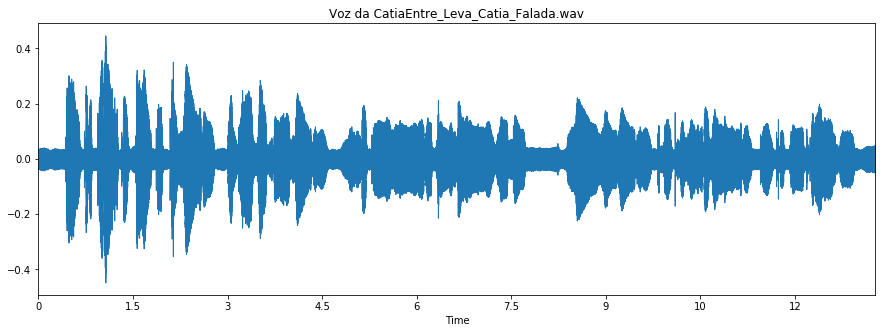

In [3]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveplot(v1, sr=sr1)
plt.title('Voz da Catia' + audio1)

### 2.1 Definição dos Parâmetros da Análise 

In [4]:
print('Frequência de Amostragem', sr1)

Frequência de Amostragem 22050


In [5]:
fa = sr1
print(fa)

22050


In [6]:
Ts = 0.04   # Tempo de duração do segmento em segundos
Nj = int(Ts*fa) # Número de pontos da Janela
print('Tamanho do Segmento', Nj)

Tamanho do Segmento 882


In [7]:
Nseg = int(len(v1)/Nj)
Nover = int(Nj*0.5)
print('Número de Segmentos no Arquivo', Nseg, '. Pontos Soprepostos', Nover )

Número de Segmentos no Arquivo 331 . Pontos Soprepostos 441


<h3> 2.2 Obtendo uma Janela de Hamming </h3>

Text(0.5, 1.0, 'Janela de Hamming')

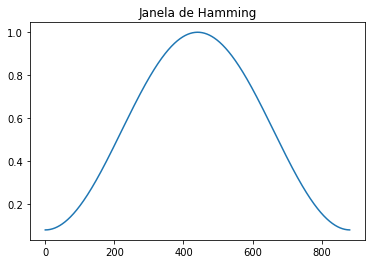

In [8]:
from scipy import signal
hm = signal.get_window('hamming', Nj)
plt.plot(hm); plt.title('Janela de Hamming')

<h2> 3. Energia de Tempo Curto </h2>

### 3.1 Cálculo para arquivo de teste 

Text(0.5, 0, 'Segmento')

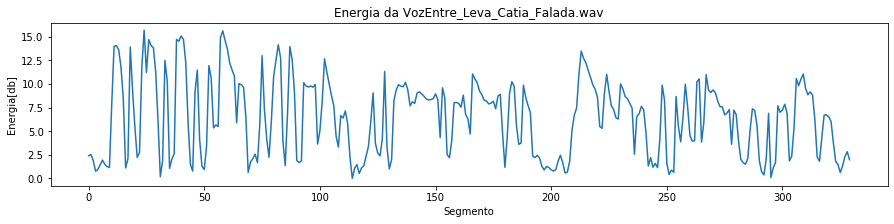

In [9]:
Nover = int(Nj*0.5)
Nseg = int(len(v1)/Nj)
E = []
for l in range(1, Nseg):
    xjan = v1[(l-1)*Nj+Nover:l*Nj+Nover]*hm
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj
    E.append(aux)
E = 10*np.log10(E)
Emin = np.min(E)  # calcula nível de ruído de fundo
plt.figure
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(E - Emin)
plt.title('Energia da Voz' + audio1)
plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

### 3.2 Agora leia os seus arquivos gravados e: 
**Determine o Contorno de Energia para três arquivos que vocês gravaram:** 
1. *dígitos*
2. *voz falada*
3. *voz declamada (poema)*


<h2> 4. Espectrogramas </h2>

### 4.1 Visualização do Espectrograma para Arquivo de Teste

Text(0.5, 1.0, 'Potência e Espectrograma Linear na FrequênciaEntre_Leva_Catia_Falada.wav')

<Figure size 864x576 with 0 Axes>

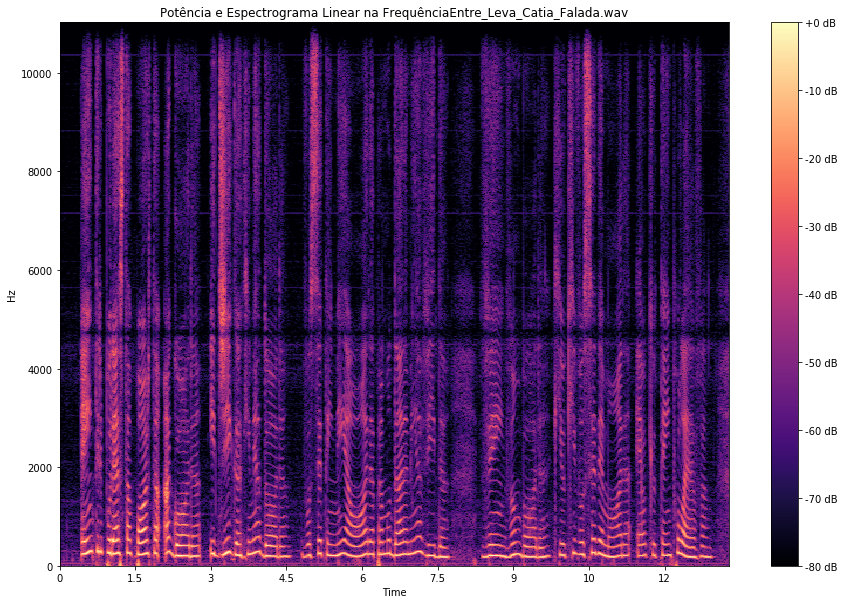

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v1)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência'+ audio1)

### 4.2 Agora com os seus arquivos
**Faça os espectrogramas para os arquivos que vocês gravaram e calculem o contorno de energia:**
<ul>
<li> Dígitos </li>
<li> Texto Lido </li>
<li> Poesia </li>
</ul>

<h2> 5. Determinação do Pitch e da F0 </h2>

### 5.1 Pitch do Arquivo Teste1

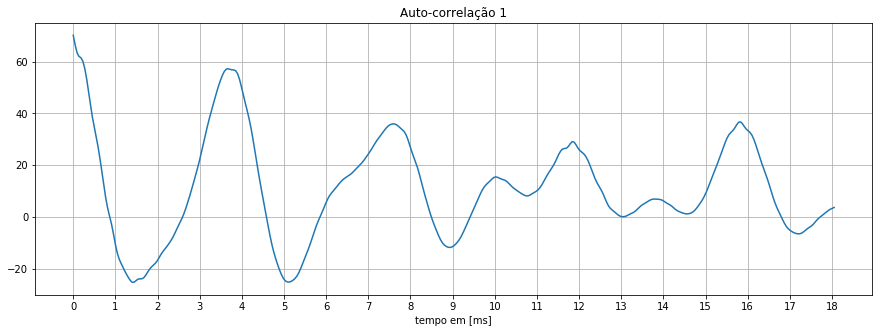

In [12]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
acEn = librosa.autocorrelate(v1En, max_size= sr1/32)
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(1))
y1 = acEn[1:400]
x1 = range(len(y1))
xx = [i*1000/sr1 for i in x1]
plt.grid(True)
ax.plot(xx,y1)

plt.title('Auto-correlação 1')
plt.xlabel('tempo em [ms]')
plt.show()

### O Período de Pitch ($T_{0}$) será o intervalo entre picos sucessivos. 
### A Frequência Fundamental ($f_0$) será o inverso do periódo de Pitch

### 5.2 Pitch do Arquivo Teste2

Determine o Período de Pitch e a Fundamental desta vogal. 

## Agora com cada um dos seus arquivos: 
**Determine o Pitch e a $f_0$ das vogais que desejarem (três vogais diferentes) dos seus arquivos, para as versões:**
1. Dígitos
2. Falada
3. Declamada

## 5.3 Determinação das Formantes 

#### 5.3.a Formantes do trecho de teste

In [16]:
v1En

array([0.0313025 , 0.03158455, 0.03017597, ..., 0.02949389, 0.03941555,
       0.05965653], dtype=float32)

In [17]:
fa

22050

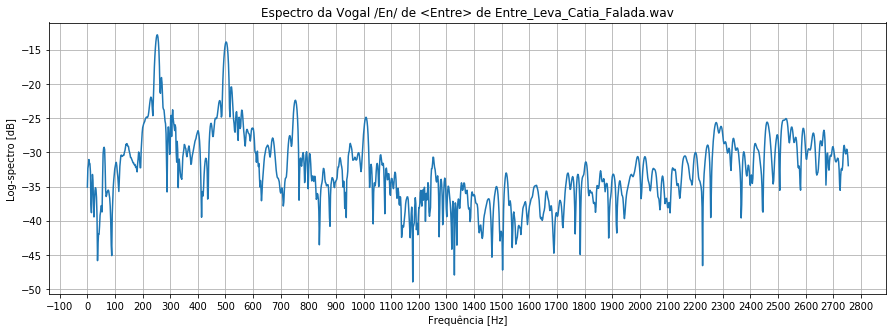

In [15]:
# AUDIO DE "En" em v1En
f, Pxx_spec = signal.periodogram(v1En, fa, 'flattop', scaling='spectrum')
lf = len(f)
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal /En/ de <Entre> de '+audio1)
plt.grid(True)
plt.show()


#### 5.3.b Os quatro primeros picos no espectro são as formantes $f_1$ a $f_4$
### 5.4 Agora com seus arquivos
Determine as formantes das vogais dos arquivos que vocês calcularam os espectrogramas

## 6. Determinação de Consoantes e Plosivos

Usando alguns de seus arquivos, no espectrograma, determine algumas consoantes surdas (p.ex. /s/ e /f/), surdas plosivas (p.ex. /p/, /t/ ou /k/) e sonoras (p.ex. (/b/, /v/, /g/, /m/, /nh/ e /lh/). Destaque circundando-as no espectrograma.

# 7. RELATÓRIO

* A áudio descrição pode ser mais simplificada, pois neste Lab são muitos os arquivos de áudio.  
* Na página do Laboratório (LEMBREM-SE que os notebooks são ANEXOS, e não páginas html), incluir os arquivos de voz de cada um dos integrantes.
*   Fazer uma tabela com todos os valores de pitch e $f_0$ de todos os integrantes, de acordo com o item 5.2., e comparem-nas.
* Escolher um conjunto de formantes ($f_1$ a $f_4$) de cada integrante, para a mesma vogal, e comparem-nas.
* Fazer uma seção de **Comentários e Conclusões** incluindo a análise dos espectrogramas das consoantes.

